In [1]:
import os
os.environ["KERAS_BACKEND"] = "jax"
import jax
import keras
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

2110848/2110848 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [8]:
train_labels

array([ 3,  4,  3, ..., 25,  3, 25])

In [9]:
category_number = max(train_labels)
category_number

np.int64(45)

In [13]:
def vectorize_set(input_x, dimensions):
    results = np.zeros((len(input_x), dimensions))
    for i, seq in enumerate(input_x):
        for val in seq:
            results[i, val] = 1
    return results

def to_one_hot(input_y):
    cat_vals = max(input_y).item() + 1
    results = np.zeros((len(input_y), cat_vals))
    for i, val in enumerate(input_y):
        results[i, val] = 1
    return results

In [14]:
x_train = vectorize_set(train_data, 10000)
y_train = to_one_hot(train_labels)
x_test = vectorize_set(test_data, 10000)
y_test = to_one_hot(test_labels)

In [15]:
model = keras.models.Sequential([
    keras.layers.Dense(64, activation="relu"),
    keras.layers.Dense(64, activation="relu"),
    keras.layers.Dense(46, activation="softmax")
])

In [16]:
model.compile(optimizer="rmsprop", loss="categorical_crossentropy", metrics=["accuracy"])

Platform 'METAL' is experimental and not all JAX functionality may be correctly supported!
W0000 00:00:1732647405.887530 37064625 mps_client.cc:510] WARNING: JAX Apple GPU support is experimental and not all JAX functionality is correctly supported!
I0000 00:00:1732647405.899170 37064625 service.cc:145] XLA service 0x600003425100 initialized for platform METAL (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1732647405.899184 37064625 service.cc:153]   StreamExecutor device (0): Metal, <undefined>
I0000 00:00:1732647405.902097 37064625 mps_client.cc:406] Using Simple allocator.
I0000 00:00:1732647405.902110 37064625 mps_client.cc:384] XLA backend will use up to 28989243392 bytes on device 0 for SimpleAllocator.


Metal device set to: Apple M3 Pro


In [19]:
random_order = np.random.permutation(len(x_train))
shuffled_x = x_train[random_order]
shuffled_y = y_train[random_order]
validation_size = 1000
val_x = shuffled_x[:1000]
partial_x = shuffled_x[1000:]
val_y = shuffled_y[:1000]
partial_y = shuffled_y[1000:]

In [20]:
history = model.fit(partial_x, partial_y, epochs=20, batch_size=512, validation_data=(val_x, val_y))

Epoch 1/20


/Users/ethanvizitei/Code/Personal/dlwp/venv/lib/python3.10/site-packages/jax/_src/interpreters/mlir.py:1114: UserWarning: Some donated buffers were not usable: ShapedArray(float32[10000,64]), ShapedArray(float32[64]), ShapedArray(float32[64,64]), ShapedArray(float32[64]), ShapedArray(float32[64,46]), ShapedArray(float32[46]), ShapedArray(int32[]), ShapedArray(float32[]), ShapedArray(float32[10000,64]), ShapedArray(float32[64]), ShapedArray(float32[64,64]), ShapedArray(float32[64]), ShapedArray(float32[64,46]), ShapedArray(float32[46]), ShapedArray(float32[]), ShapedArray(float32[]), ShapedArray(float32[]), ShapedArray(float32[]).
Donation is not implemented for ('METAL',).
See an explanation at https://jax.readthedocs.io/en/latest/faq.html#buffer-donation.
  warnings.warn("Some donated buffers were not usable:"


15/16 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.4073 - loss: 3.3079

/Users/ethanvizitei/Code/Personal/dlwp/venv/lib/python3.10/site-packages/jax/_src/interpreters/mlir.py:1114: UserWarning: Some donated buffers were not usable: ShapedArray(float32[10000,64]), ShapedArray(float32[64]), ShapedArray(float32[64,64]), ShapedArray(float32[64]), ShapedArray(float32[64,46]), ShapedArray(float32[46]), ShapedArray(int32[]), ShapedArray(float32[]), ShapedArray(float32[10000,64]), ShapedArray(float32[64]), ShapedArray(float32[64,64]), ShapedArray(float32[64]), ShapedArray(float32[64,46]), ShapedArray(float32[46]), ShapedArray(float32[]), ShapedArray(float32[]), ShapedArray(float32[]), ShapedArray(float32[]).
Donation is not implemented for ('METAL',).
See an explanation at https://jax.readthedocs.io/en/latest/faq.html#buffer-donation.
  warnings.warn("Some donated buffers were not usable:"
/Users/ethanvizitei/Code/Personal/dlwp/venv/lib/python3.10/site-packages/jax/_src/interpreters/mlir.py:1114: UserWarning: Some donated buffers were not usable: ShapedArray(float

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.4127 - loss: 3.2844

/Users/ethanvizitei/Code/Personal/dlwp/venv/lib/python3.10/site-packages/jax/_src/interpreters/mlir.py:1114: UserWarning: Some donated buffers were not usable: ShapedArray(float32[10000,64]), ShapedArray(float32[64]), ShapedArray(float32[64,64]), ShapedArray(float32[64]), ShapedArray(float32[64,46]), ShapedArray(float32[46]), ShapedArray(float32[]), ShapedArray(float32[]), ShapedArray(float32[]), ShapedArray(float32[]).
Donation is not implemented for ('METAL',).
See an explanation at https://jax.readthedocs.io/en/latest/faq.html#buffer-donation.
  warnings.warn("Some donated buffers were not usable:"


16/16 ━━━━━━━━━━━━━━━━━━━━ 4s 83ms/step - accuracy: 0.4176 - loss: 3.2633 - val_accuracy: 0.6190 - val_loss: 1.9373
Epoch 2/20


/Users/ethanvizitei/Code/Personal/dlwp/venv/lib/python3.10/site-packages/jax/_src/interpreters/mlir.py:1114: UserWarning: Some donated buffers were not usable: ShapedArray(float32[10000,64]), ShapedArray(float32[64]), ShapedArray(float32[64,64]), ShapedArray(float32[64]), ShapedArray(float32[64,46]), ShapedArray(float32[46]), ShapedArray(float32[]), ShapedArray(float32[]), ShapedArray(float32[]), ShapedArray(float32[]).
Donation is not implemented for ('METAL',).
See an explanation at https://jax.readthedocs.io/en/latest/faq.html#buffer-donation.
  warnings.warn("Some donated buffers were not usable:"


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6436 - loss: 1.7293 - val_accuracy: 0.6860 - val_loss: 1.4566
Epoch 3/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7222 - loss: 1.2811 - val_accuracy: 0.7330 - val_loss: 1.2282
Epoch 4/20


/Users/ethanvizitei/Code/Personal/dlwp/venv/lib/python3.10/site-packages/jax/_src/interpreters/mlir.py:1114: UserWarning: Some donated buffers were not usable: ShapedArray(float32[10000,64]), ShapedArray(float32[64]), ShapedArray(float32[64,64]), ShapedArray(float32[64]), ShapedArray(float32[64,46]), ShapedArray(float32[46]), ShapedArray(int32[]), ShapedArray(float32[]), ShapedArray(float32[10000,64]), ShapedArray(float32[64]), ShapedArray(float32[64,64]), ShapedArray(float32[64]), ShapedArray(float32[64,46]), ShapedArray(float32[46]), ShapedArray(float32[]), ShapedArray(float32[]), ShapedArray(float32[]), ShapedArray(float32[]).
Donation is not implemented for ('METAL',).
See an explanation at https://jax.readthedocs.io/en/latest/faq.html#buffer-donation.
  warnings.warn("Some donated buffers were not usable:"


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7744 - loss: 1.0237 - val_accuracy: 0.7610 - val_loss: 1.1160
Epoch 5/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8241 - loss: 0.8355 - val_accuracy: 0.7730 - val_loss: 1.0454
Epoch 6/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8533 - loss: 0.6782 - val_accuracy: 0.7810 - val_loss: 0.9952
Epoch 7/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8758 - loss: 0.5744 - val_accuracy: 0.8020 - val_loss: 0.9387
Epoch 8/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8932 - loss: 0.5027 - val_accuracy: 0.7910 - val_loss: 0.9669
Epoch 9/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9131 - loss: 0.4054 - val_accuracy: 0.8110 - val_loss: 0.9026
Epoch 10/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9263 - loss: 0.3569 - val_accuracy: 0.8120 - val_loss: 0.9036
Epoch 11/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9349 - loss: 0.2964 - val_accuracy: 0.8110 - val_loss: 0.9027
E

In [21]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

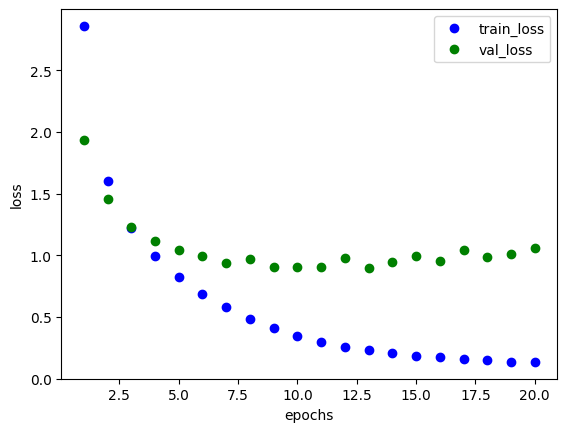

In [22]:
h_dict = history.history
epochs = range(1, 21)
l_val = h_dict["loss"]
val_l = h_dict["val_loss"]
plt.plot(epochs, l_val, "bo", label="train_loss")
plt.plot(epochs, val_l, "go", label="val_loss")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend()
plt.show()

In [29]:
c_model = keras.models.clone_model(model)
c_model.compile(optimizer="rmsprop", loss="categorical_crossentropy", metrics=["accuracy"])
c_model.fit(x_train, y_train, epochs=9, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/9
17/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4141 - loss: 3.1924

/Users/ethanvizitei/Code/Personal/dlwp/venv/lib/python3.10/site-packages/jax/_src/interpreters/mlir.py:1114: UserWarning: Some donated buffers were not usable: ShapedArray(float32[10000,64]), ShapedArray(float32[64]), ShapedArray(float32[64,64]), ShapedArray(float32[64]), ShapedArray(float32[64,46]), ShapedArray(float32[46]), ShapedArray(int32[]), ShapedArray(float32[]), ShapedArray(float32[10000,64]), ShapedArray(float32[64]), ShapedArray(float32[64,64]), ShapedArray(float32[64]), ShapedArray(float32[64,46]), ShapedArray(float32[46]), ShapedArray(float32[]), ShapedArray(float32[]), ShapedArray(float32[]), ShapedArray(float32[]).
Donation is not implemented for ('METAL',).
See an explanation at https://jax.readthedocs.io/en/latest/faq.html#buffer-donation.
  warnings.warn("Some donated buffers were not usable:"
/Users/ethanvizitei/Code/Personal/dlwp/venv/lib/python3.10/site-packages/jax/_src/interpreters/mlir.py:1114: UserWarning: Some donated buffers were not usable: ShapedArray(float

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.4263 - loss: 3.1317
Epoch 2/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6799 - loss: 1.5558
Epoch 3/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7529 - loss: 1.1617
Epoch 4/9


/Users/ethanvizitei/Code/Personal/dlwp/venv/lib/python3.10/site-packages/jax/_src/interpreters/mlir.py:1114: UserWarning: Some donated buffers were not usable: ShapedArray(float32[10000,64]), ShapedArray(float32[64]), ShapedArray(float32[64,64]), ShapedArray(float32[64]), ShapedArray(float32[64,46]), ShapedArray(float32[46]), ShapedArray(int32[]), ShapedArray(float32[]), ShapedArray(float32[10000,64]), ShapedArray(float32[64]), ShapedArray(float32[64,64]), ShapedArray(float32[64]), ShapedArray(float32[64,46]), ShapedArray(float32[46]), ShapedArray(float32[]), ShapedArray(float32[]), ShapedArray(float32[]), ShapedArray(float32[]).
Donation is not implemented for ('METAL',).
See an explanation at https://jax.readthedocs.io/en/latest/faq.html#buffer-donation.
  warnings.warn("Some donated buffers were not usable:"


18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7987 - loss: 0.9406
Epoch 5/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8376 - loss: 0.7569
Epoch 6/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8734 - loss: 0.6121
Epoch 7/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8953 - loss: 0.5154
Epoch 8/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9129 - loss: 0.4246
Epoch 9/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9288 - loss: 0.3560
 1/71 ━━━━━━━━━━━━━━━━━━━━ 16s 237ms/step - accuracy: 0.8438 - loss: 0.7190

/Users/ethanvizitei/Code/Personal/dlwp/venv/lib/python3.10/site-packages/jax/_src/interpreters/mlir.py:1114: UserWarning: Some donated buffers were not usable: ShapedArray(float32[10000,64]), ShapedArray(float32[64]), ShapedArray(float32[64,64]), ShapedArray(float32[64]), ShapedArray(float32[64,46]), ShapedArray(float32[46]), ShapedArray(float32[]), ShapedArray(float32[]), ShapedArray(float32[]), ShapedArray(float32[]).
Donation is not implemented for ('METAL',).
See an explanation at https://jax.readthedocs.io/en/latest/faq.html#buffer-donation.
  warnings.warn("Some donated buffers were not usable:"


70/71 ━━━━━━━━━━━━━━━━━━━━ 0s 947us/step - accuracy: 0.7858 - loss: 1.0616 

/Users/ethanvizitei/Code/Personal/dlwp/venv/lib/python3.10/site-packages/jax/_src/interpreters/mlir.py:1114: UserWarning: Some donated buffers were not usable: ShapedArray(float32[10000,64]), ShapedArray(float32[64]), ShapedArray(float32[64,64]), ShapedArray(float32[64]), ShapedArray(float32[64,46]), ShapedArray(float32[46]), ShapedArray(float32[]), ShapedArray(float32[]), ShapedArray(float32[]), ShapedArray(float32[]).
Donation is not implemented for ('METAL',).
See an explanation at https://jax.readthedocs.io/en/latest/faq.html#buffer-donation.
  warnings.warn("Some donated buffers were not usable:"


71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.7855 - loss: 1.0625


In [30]:
results

[1.0872306823730469, 0.7787176966667175]